In [1]:
import matplotlib.pyplot as plt # PARA LOS PLOTS
import numpy as np # PARA OPERACIONES MATRICIALES
import time #PARA ANIMAR LOS PLOTS

In [2]:
def dijkstra(matrix, start, end):
    rows, cols = matrix.shape
    distance = np.full((rows, cols), np.inf)  # Inicializa todas las distancias como infinito
    visited = np.zeros((rows, cols), dtype=bool)
    prev = np.zeros((rows, cols, 2), dtype=int)  # Almacena los nodos previos para reconstruir el camino

    distance[start] = 0

    while True:
        # Encuentra el nodo no visitado con la distancia mínima
        min_distance = np.inf
        current = None
        for r in range(rows):
            for c in range(cols):
                if not visited[r, c] and distance[r, c] < min_distance:
                    min_distance = distance[r, c]
                    current = (r, c)

        if current is None:
            break

        r, c = current
        visited[r, c] = True

        # Verifica vecinos
        for dr, dc in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols and not visited[nr, nc] and matrix[nr, nc] == 0:
                new_distance = distance[r, c] + 1  # Costo de movimiento entre celdas (en este caso, todas las celdas tienen el mismo costo)
                if new_distance < distance[nr, nc]:
                    distance[nr, nc] = new_distance
                    prev[nr, nc] = (r, c)

    # Reconstruir el camino desde el final hasta el inicio
    path = []
    r, c = end
    while (r, c) != start:
        path.append((r, c))
        r, c = prev[r, c]
    path.append(start)
    path.reverse()

    return path




In [3]:
# Ejemplo de uso:
matrix = np.zeros((10, 10))  # Matriz 10x10  llena de ceros al principio
start = (0, 5)  # Coordenadas de inicio
end = (2, 9)    # Coordenadas de final

path = dijkstra(matrix, start, end)
print("Camino encontrado:", path)

Camino encontrado: [(0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9)]


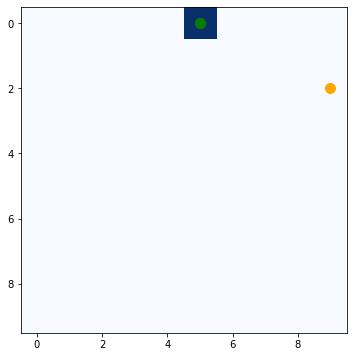

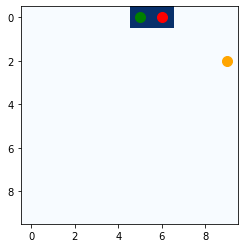

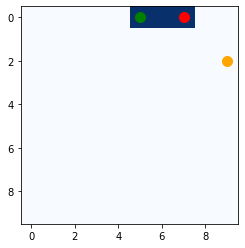

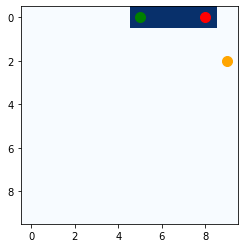

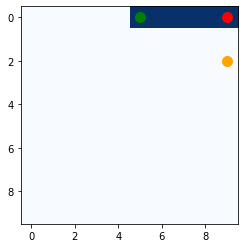

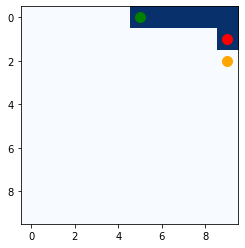

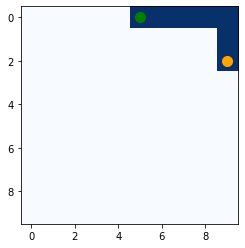

In [4]:
def visualize(matrix, current):
    plt.clf()
    plt.imshow(matrix, cmap='Blues', vmin=0, vmax=1)
    plt.scatter(current[1],current[0], color='red', marker='o', s=100)  # Marca la posición actual ¿quien sabe porqué hay que invertirlas?
    plt.scatter(start[1],start[0], color='green', marker='o', s=100)  # Marca el inicio
    plt.scatter(end[1],end[0], color='orange', marker='o', s=100)  # Marca el final
    plt.pause(0.1)

# Algoritmo principal
dijkstra(matrix, start, end)


plt.ion()
plt.figure(figsize=(6, 6))

#visualizar el proceso paso a paso
for current in path:
    matrix[current] = 1  # Marca el camino en la matriz
    visualize(matrix, current)
    time.sleep(0.1)
plt.ioff()
plt.show()

In [5]:
matrix = np.full((10, 10), 1)  # Matriz 10x10 inicialmente llena de obstáculos (1)
start = (0, 0)  # Coordenadas de inicio
end = (9, 9)

In [6]:
print(matrix)

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]
